In [47]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from sklearn import datasets
import matplotlib.patches as mpatches

In [20]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [23]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(iris_df.iloc[:,:])

In [24]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 6))

In [25]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [26]:
TWSS

[12.127790750538194, 6.982216473785234, 5.516933472040371, 4.618621018928891]

Text(0, 0.5, 'total_within_SS')

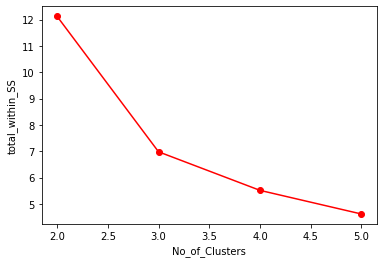

In [27]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [28]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)

In [29]:
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
f = pd.Series(model.labels_)

In [32]:
iris_df['clust'] = f

In [36]:
iris_df.iloc[:, :5].groupby(iris_df.clust).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clust
clust,,,,,
0,5.888525,2.737705,4.396721,1.418033,0
1,5.006000,3.428000,1.462000,0.246000,1
2,6.846154,3.082051,5.702564,2.079487,2


In [56]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

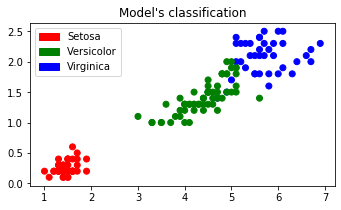

In [57]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)


plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c = colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])